In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [57]:
# upload gambar 
image = Image.open("bebek.jpg").convert("RGB")
image_np = np.array(image)

In [58]:
# Ukuran gambar
h, w, c = image_np.shape


In [ ]:
# palette warna
palette = np.array([
    [0, 0, 0],       # Hitam
    [255, 0, 0],     # Merah
    [0, 0, 255],     # Biru
    [0, 255, 0]      # Hijau
])

In [ ]:

# Buat array kosong untuk menyimpan index warna terdekat
gambar_diindeks = np.zeros((h, w), dtype=np.uint8)

# Loop pixel satu per satu dan hitung jarak Euclidean
for i in range(h):
    for j in range(w):
        pixel = image_np[i, j]
        jarak = np.linalg.norm(palette - pixel, axis=1)
        indeks_warna_terdekat = np.argmin(jarak)
        gambar_diindeks[i, j] = indeks_warna_terdekat


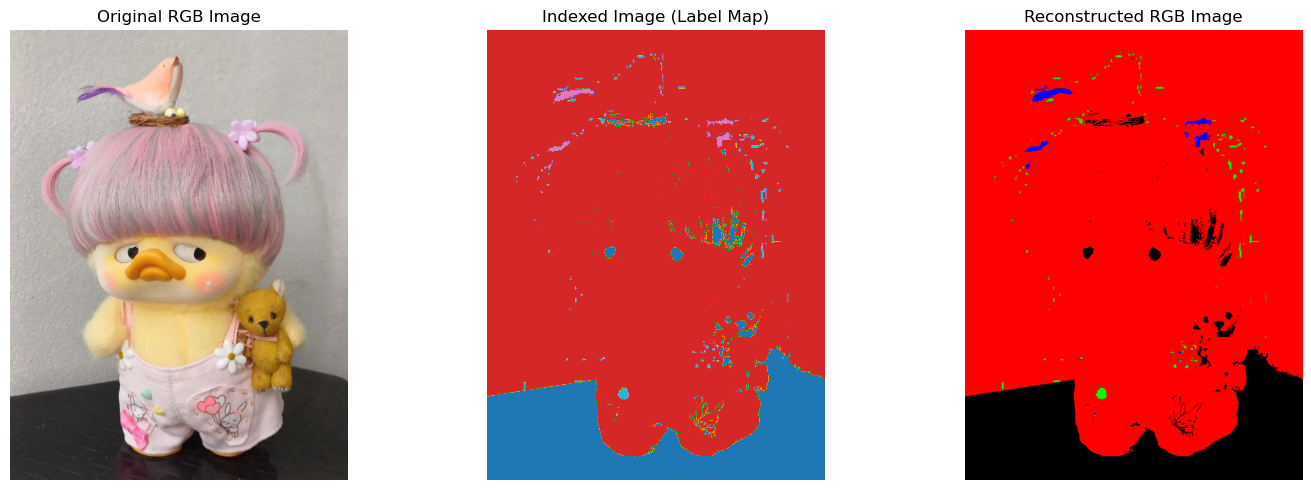

In [ ]:

# Visualisasi hasil
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title("Original RGB Image")
plt.imshow(image_np)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Indexed Image (Label Map)")
plt.imshow(gambar_diindeks, cmap='tab10')
plt.axis('off')

# Rekonstruksi gambar berdasarkan index dan palette
reconstructed_image = np.zeros_like(image_np)
for idx in range(len(palette)):
    mask = gambar_diindeks == idx
    reconstructed_image[mask] = palette[idx]

plt.subplot(1, 3, 3)
plt.title("Reconstructed RGB Image")
plt.imshow(reconstructed_image)
plt.axis('off')
plt.tight_layout()
plt.show()